# Exploring and visualizing data

Throughout this course, we will examine a number of datasets and develop techniques to quantify relationships between observed data. However, before we develop quantitative models of data, it is often useful to first develop a _qualitative_ understanding of the relationships present in data, which we can then use to formulate hypotheses that can be tested using quantitive models.

Visualization is often an extremely useful tool for uncovering relationships within data. In this section, we walk through several examples of exploring and visualizing data in python.

## Infant mortality data
## Loading data into python

Before we can perform any analysis, we first need to load data into python. We will most commonly use the python package `pandas` to do this. We first import `pandas` so that we can use methods contained in the package.

In [1]:
import pandas as pd

Note here that `as pd` assigns the `pandas` package the alias `pd`, so that we whenever we want to refer to `pandas` in the subsequent code, we can just use `pd` (rather than typing out `pandas` every time). This is standard practice with many packages in python, as you will see.

Now that we've loaded `pandas`, we can use the `read_csv` method to read in a dataset and inspect the first few rows.

In [2]:
mortality_data = pd.read_csv('datasets/infant_mortality.csv')
mortality_data.head()

,country,income,infant_mortality,region,oil
0,Australia,3426,26.7,Asia,no
1,Austria,3350,23.7,Europe,no
2,Belgium,3346,17.0,Europe,no
3,Canada,4751,16.8,Americas,no
4,Denmark,5029,13.5,Europe,no


There are a few observations where infant mortality is not reported, so let's remove these from the dataset.

In [3]:
mortality_data = mortality_data.dropna()

When you read a dataset in python using `pandas`, it is stored as as `pandas.DataFrame` object, which we can check using the `type` function:

In [4]:
type(mortality_data)

pandas.core.frame.DataFrame

Dataframes are very convenient ways to work with data, as we will see throughout this course.

The infant mortality dataset contains the following information about 101 countries (after removing 4 without available infant mortality rates): the per-capita income, the infant mortality rate, its region in the world, and whether or not the country is oil-exporting.

## Basic visualization

For now, let's focus on the variables `infant_mortality` and `income`. A histogram is a common way to visualize the distributions of these features, which we can create using the package `matplotlib`.

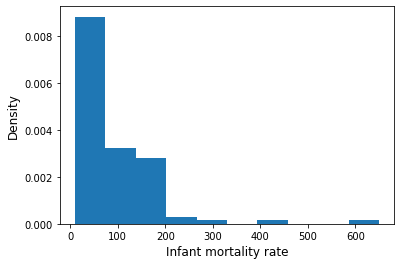

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(mortality_data["infant_mortality"], bins=10, density=True)
plt.xlabel("Infant mortality rate", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

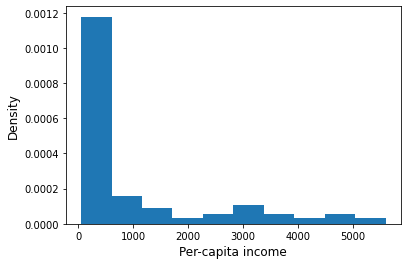

In [6]:
plt.hist(mortality_data["income"], bins=10, density=True)
plt.xlabel("Per-capita income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

A couple things to note from the `matplotlib` side: first, we can specify the number of bins using the `bins` argument -- choosing an appropriate number of bins is often important when making qualitative assessments of a distribution. Second, we use this argument `density=True`, which will automatically normalize the distribution so that the sum of the mass in each bin is equal to 1. If we use `density=False` (which is the default), we will instead get the counts of number of samples in each bin on the y-axis.

These histograms give us a sense of the types of values the variables `infant_mortality` and `income` can take on individually, and we will discuss this more shortly. But what about the relationship between these two features? A simple way to inspect this relationship is by creating a scatter plot.

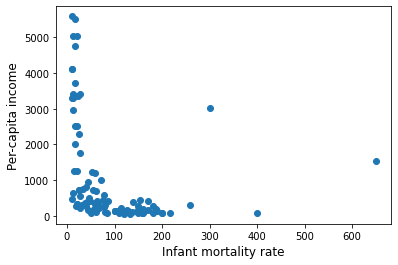

In [7]:
plt.scatter(mortality_data["infant_mortality"], mortality_data["income"])
plt.xlabel("Infant mortality rate", fontsize=12)
plt.ylabel("Per-capita income", fontsize=12)
plt.show()

If we want a slightly prettier figure, we can actually combine the joint scatter plots and the histograms into a single plot using the library `seaborn`.

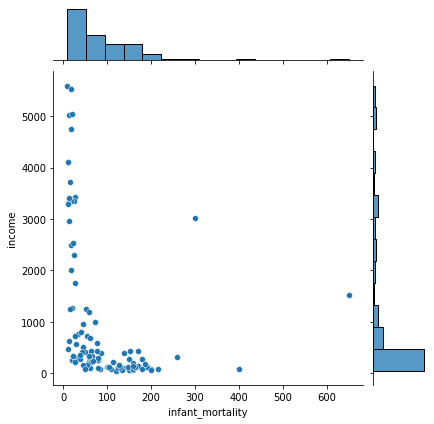

In [8]:
import seaborn as sns

sns.jointplot(x=mortality_data["infant_mortality"], y=mortality_data["income"])
plt.xlabel("Infant mortality rate", fontsize=12)
plt.ylabel("Per-capita income", fontsize=12)
plt.show()

From the joint plot,  we observe that in general there is a negative relationship between infant mortality rate and per-capita income -- richer countries tend to have lower infant mortality rates. However, there are a few outliers: countries that have high income _and_ high infant mortality. We can quickly find these by looking back at the data.

In [9]:
mortality_data[mortality_data["infant_mortality"] > 280]

,country,income,infant_mortality,region,oil
25,Libya,3010,300.0,Africa,yes
27,Saudi.Arabia,1530,650.0,Asia,yes
72,Afganistan,75,400.0,Asia,no


We see that the two outliers are Libya and Saudi Arabia. Interestingly, we note these two countries are both oil exporting countries. So perhaps we may hypothesize that the relationship between infant mortality and per-capita income depends on whether or not the countries are oil exporting. Let's plot these features for oil-exporting countries only to see if this is indeed the case.

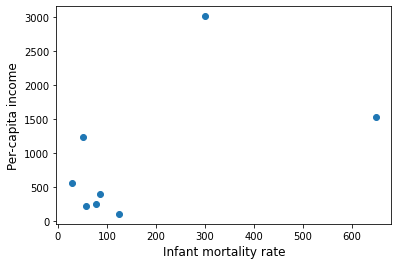

In [10]:
# select only the oil exporting countries
mortality_data_oil_exporting = mortality_data[mortality_data["oil"] == "yes"]

plt.scatter(mortality_data_oil_exporting["infant_mortality"], mortality_data_oil_exporting["income"])
plt.xlabel("Infant mortality rate", fontsize=12)
plt.ylabel("Per-capita income", fontsize=12)
plt.show()

Now the negative relationship we observed below appears to disappear! If we were researchers of infant mortality, this would now provide a new hypothesis ripe for further investigation. In particular, we may want to quantify exactly how much income influences infant mortality rate, and how this quantity changes when we control for whether a country is oil-exporting.

## Transforming data

Let's return again to the histograms we plotted earlier of income and infant mortality. Notice from this histograms that both infant mortality and per-capita income are heavily skewed to the right -- meaning that there are many outliers on the high end of either variable. This also distorts the joint plot by making the relationship more exteme on the low income/high mortality and high income/low mortality ends. As we will see later, when we want to build a statistical model for this relationship, it will often make things easier to first remove the skew in our data.

One way that we can mitigate skew is by _transforming_ the features. Since the issue is with a few large values, we should consider transformations that "squish" large values. For example we might consider one of the following transformations which has this property: $T(x)=\log(x), T(x) = \sqrt{x}$  or more generally $T(x) = |x|^{1/p}$ for $p\geq 1$.

Let's see what happens to the histograms when we perform these transformations to the per-capita income and infant mortality variables.

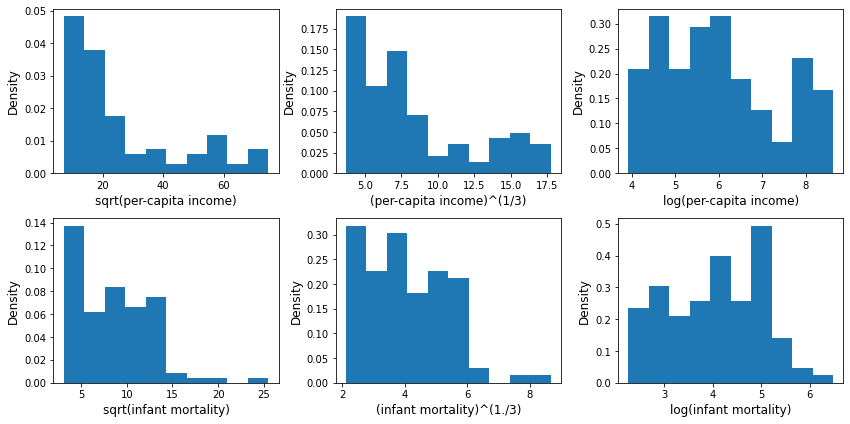

In [11]:
import numpy as np

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

axs[0,0].hist(np.sqrt(mortality_data["income"]), bins=10, density=True)
axs[0,0].set_xlabel("sqrt(per-capita income)", fontsize=12)
axs[0,0].set_ylabel("Density", fontsize=12)

axs[0,1].hist(mortality_data["income"]**(1./3), bins=10, density=True)
axs[0,1].set_xlabel("(per-capita income)^(1/3)", fontsize=12)
axs[0,1].set_ylabel("Density", fontsize=12)

axs[0,2].hist(np.log(mortality_data["income"]), bins=10, density=True)
axs[0,2].set_xlabel("log(per-capita income)", fontsize=12)
axs[0,2].set_ylabel("Density", fontsize=12)

axs[1,0].hist(np.sqrt(mortality_data["infant_mortality"]), bins=10, density=True)
axs[1,0].set_xlabel("sqrt(infant mortality)", fontsize=12)
axs[1,0].set_ylabel("Density", fontsize=12)

axs[1,1].hist(mortality_data["infant_mortality"]**(1./3), bins=10, density=True)
axs[1,1].set_xlabel("(infant mortality)^(1./3)", fontsize=12)
axs[1,1].set_ylabel("Density", fontsize=12)

axs[1,2].hist(np.log(mortality_data["infant_mortality"]), bins=10, density=True)
axs[1,2].set_xlabel("log(infant mortality)", fontsize=12)
axs[1,2].set_ylabel("Density", fontsize=12)

plt.tight_layout()
plt.show()

From these plots it seems as though the log transformation does the best job of removing skew from the income and infant mortality features. Let's look at another joint plot of income and infant mortality, but this time on the log scale.

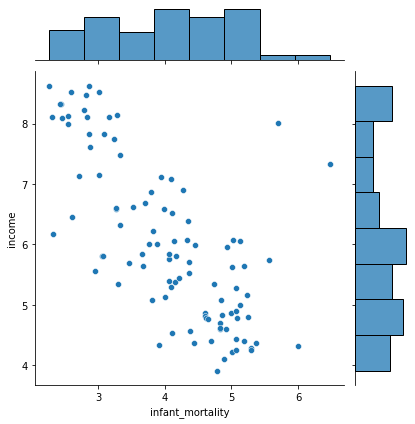

In [12]:
sns.jointplot(x=np.log(mortality_data["infant_mortality"]), y=np.log(mortality_data["income"]))
plt.xlabel("log(Infant mortality rate)", fontsize=12)
plt.ylabel("log(Per-capita income)", fontsize=12)
plt.show()

With the new transformed features, we can still see the two outliers we identified earlier (Libya and Saudi Arabia), but now the general relationship between log-per-capital income and log-infant mortality appears to be roughly linear. In the next section, we will see that we can use this observation to build a model for the relationship between income and infant mortality.

**add some general rules for how to transform features and how to interpret changes in the transformed features**